In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('wines_SPA.csv')

In [3]:
df.head()

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,2013,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,2018,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,2009,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,1999,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,1996,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0


In [4]:
df.shape

(7500, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       7500 non-null   object 
 1   wine         7500 non-null   object 
 2   year         7498 non-null   object 
 3   rating       7500 non-null   float64
 4   num_reviews  7500 non-null   int64  
 5   country      7500 non-null   object 
 6   region       7500 non-null   object 
 7   price        7500 non-null   float64
 8   type         6955 non-null   object 
 9   body         6331 non-null   float64
 10  acidity      6331 non-null   float64
dtypes: float64(4), int64(1), object(6)
memory usage: 644.7+ KB


In [6]:
df.describe()

,rating,num_reviews,price,body,acidity
count,7500.000000,7500.000000,7500.000000,6331.000000,6331.000000
mean,4.254933,451.109067,60.095822,4.158427,2.946612
std,0.118029,723.001856,150.356676,0.583352,0.248202
min,4.200000,25.000000,4.990000,2.000000,1.000000
25%,4.200000,389.000000,18.900000,4.000000,3.000000
50%,4.200000,404.000000,28.530000,4.000000,3.000000
75%,4.200000,415.000000,51.350000,5.000000,3.000000
max,4.900000,32624.000000,3119.080000,5.000000,3.000000


In [7]:
import math
df['body'].fillna(df['body'].median(), inplace=True)
df['acidity'].fillna(df['acidity'].median(), inplace=True)

In [8]:
df.isna().sum()

winery           0
wine             0
year             2
rating           0
num_reviews      0
country          0
region           0
price            0
type           545
body             0
acidity          0
dtype: int64

In [9]:
df.dropna(inplace=True)

In [10]:
df.shape

(6953, 11)

In [11]:
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['year'] = df['year'].astype('Int64')
df['year'].fillna(df['year'].median(), inplace=True)

In [12]:
df['year'] = 2024 - df['year']

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6953 entries, 0 to 7499
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   winery       6953 non-null   object 
 1   wine         6953 non-null   object 
 2   year         6953 non-null   Int64  
 3   rating       6953 non-null   float64
 4   num_reviews  6953 non-null   int64  
 5   country      6953 non-null   object 
 6   region       6953 non-null   object 
 7   price        6953 non-null   float64
 8   type         6953 non-null   object 
 9   body         6953 non-null   float64
 10  acidity      6953 non-null   float64
dtypes: Int64(1), float64(4), int64(1), object(5)
memory usage: 658.6+ KB


In [14]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df1=df.copy()
for column in df1.columns:
    if df1[column].dtype == 'object':  
        df1[column] = label_encoder.fit_transform(df1[column])

In [15]:
!pip install category_encoders

In [16]:
import category_encoders as ce
df2=df.copy()
for column in df2.columns:
    if df2[column].dtype == 'object':  
        binary_encoder = ce.BinaryEncoder(cols=[column])
        df_binary = binary_encoder.fit_transform(df[column])


In [17]:
df_binary

,type_0,type_1,type_2,type_3,type_4
0,0,0,0,0,1
1,0,0,0,1,0
2,0,0,0,1,1
3,0,0,0,1,1
4,0,0,0,1,1
...,...,...,...,...,...
7495,0,1,0,0,0
7496,0,0,1,1,1
7497,0,0,1,0,1
7498,0,0,0,1,1


In [18]:
corr=df1.corr()

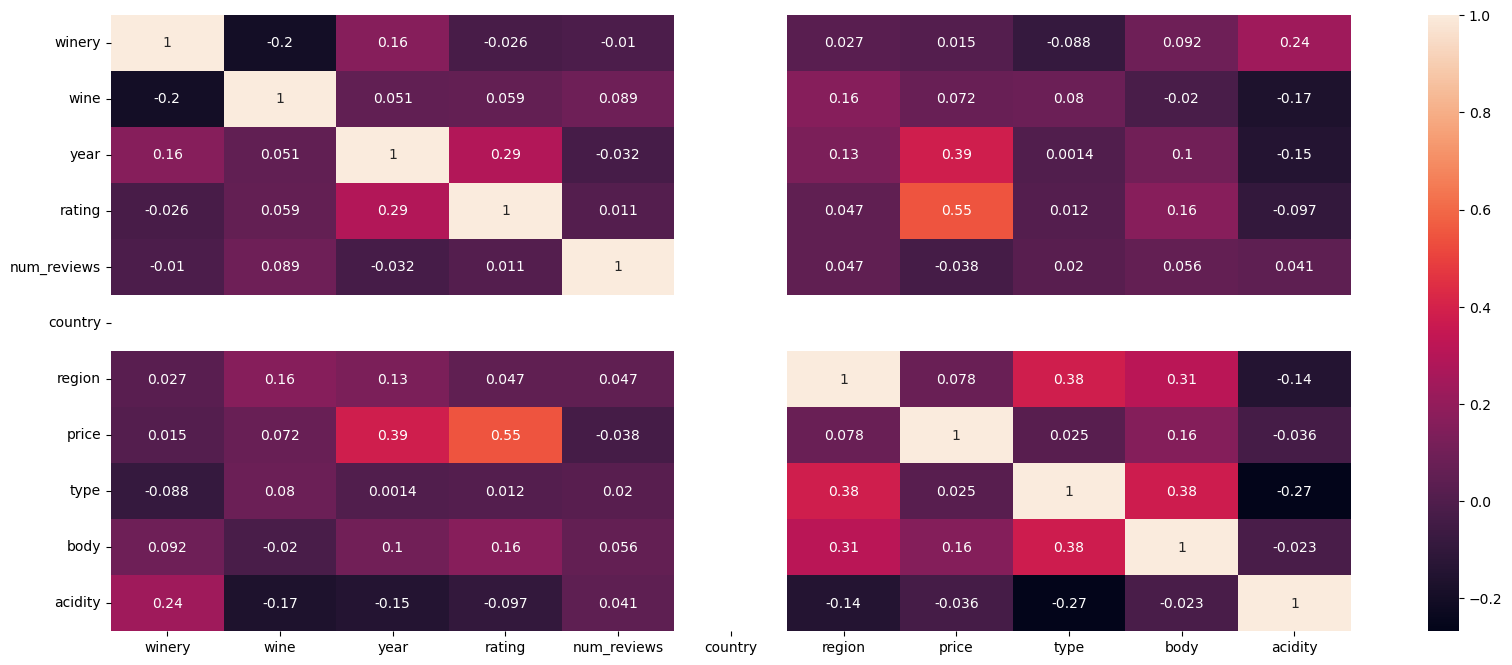

In [19]:
import seaborn as sn
plt.figure(figsize=(20,8))
sn.heatmap(corr,annot=True)
plt.show()

In [20]:
df1.drop(columns=['country','num_reviews','winery','price'],inplace=True)

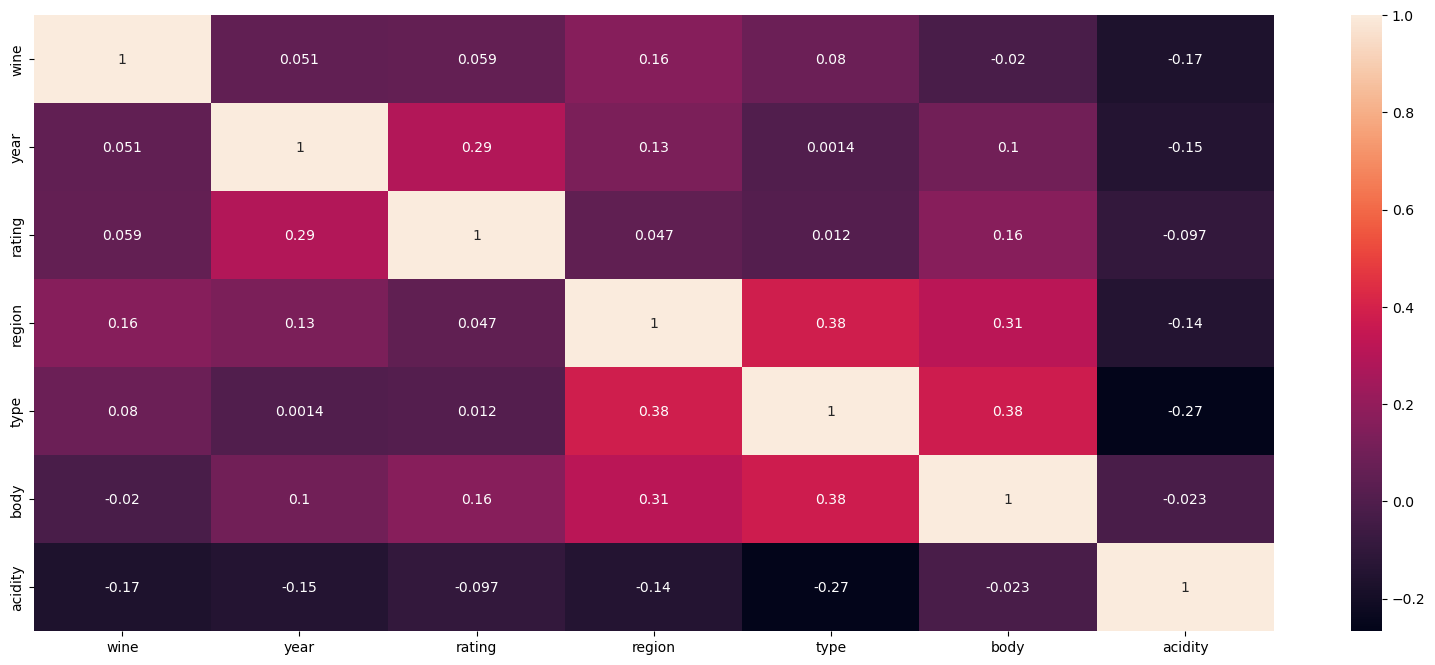

In [21]:
corr=df1.corr()
plt.figure(figsize=(20,8))
sn.heatmap(corr,annot=True)
plt.show()

In [22]:
df

,winery,wine,year,rating,num_reviews,country,region,price,type,body,acidity
0,Teso La Monja,Tinto,11,4.9,58,Espana,Toro,995.00,Toro Red,5.0,3.0
1,Artadi,Vina El Pison,6,4.9,31,Espana,Vino de Espana,313.50,Tempranillo,4.0,2.0
2,Vega Sicilia,Unico,15,4.8,1793,Espana,Ribera del Duero,324.95,Ribera Del Duero Red,5.0,3.0
3,Vega Sicilia,Unico,25,4.8,1705,Espana,Ribera del Duero,692.96,Ribera Del Duero Red,5.0,3.0
4,Vega Sicilia,Unico,28,4.8,1309,Espana,Ribera del Duero,778.06,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...
7495,Contino,Reserva,8,4.2,392,Espana,Rioja,19.98,Rioja Red,4.0,3.0
7496,Conreria d'Scala Dei,Les Brugueres,6,4.2,390,Espana,Priorato,16.76,Priorat Red,4.0,3.0
7497,Mustiguillo,Finca Terrerazo,7,4.2,390,Espana,El Terrerazo,24.45,Red,4.0,3.0
7498,Matarromera,Gran Reserva,13,4.2,389,Espana,Ribera del Duero,64.50,Ribera Del Duero Red,5.0,3.0


In [24]:
df.drop(columns=['country','num_reviews','winery','price'],inplace=True)

In [25]:
df

,wine,year,rating,region,type,body,acidity
0,Tinto,11,4.9,Toro,Toro Red,5.0,3.0
1,Vina El Pison,6,4.9,Vino de Espana,Tempranillo,4.0,2.0
2,Unico,15,4.8,Ribera del Duero,Ribera Del Duero Red,5.0,3.0
3,Unico,25,4.8,Ribera del Duero,Ribera Del Duero Red,5.0,3.0
4,Unico,28,4.8,Ribera del Duero,Ribera Del Duero Red,5.0,3.0
...,...,...,...,...,...,...,...
7495,Reserva,8,4.2,Rioja,Rioja Red,4.0,3.0
7496,Les Brugueres,6,4.2,Priorato,Priorat Red,4.0,3.0
7497,Finca Terrerazo,7,4.2,El Terrerazo,Red,4.0,3.0
7498,Gran Reserva,13,4.2,Ribera del Duero,Ribera Del Duero Red,5.0,3.0


In [26]:
label_encoder = LabelEncoder()

for column in df.columns:
    if df[column].dtype == 'object':  
        df[column] = label_encoder.fit_transform(df[column])

In [27]:
df

,wine,year,rating,region,type,body,acidity
0,691,11,4.9,64,19,5.0,3.0
1,743,6,4.9,67,18,4.0,2.0
2,709,15,4.8,52,11,5.0,3.0
3,709,25,4.8,52,11,5.0,3.0
4,709,28,4.8,52,11,5.0,3.0
...,...,...,...,...,...,...,...
7495,561,8,4.2,54,12,4.0,3.0
7496,402,6,4.2,49,9,4.0,3.0
7497,283,7,4.2,23,10,4.0,3.0
7498,316,13,4.2,52,11,5.0,3.0


In [28]:
from sklearn.model_selection import train_test_split

In [29]:
X=df.drop(columns=['type'])
y=df['type']

In [30]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.2)

In [32]:
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import RidgeClassifier, LogisticRegression
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [42]:
pipelines = {
    'rf': make_pipeline(RandomForestClassifier(random_state=1234)),
    'ridge': make_pipeline(RidgeClassifier(random_state=1234)),
    'logistic': make_pipeline(LogisticRegression(random_state=1234)),
    'svc': make_pipeline(SVC(random_state=1234)),
}

In [43]:
hyper_para_grid = {
    'rf': {
        'randomforestclassifier__n_estimators': [100, 200, 400, 800],
        'randomforestclassifier__min_samples_split': [2, 5, 10, 20, 50],
        'randomforestclassifier__min_samples_leaf': [1, 2, 4, 8, 16],
    },
    'ridge': {
        'ridgeclassifier__alpha': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 0.99],
    },
    'logistic': {
        'logisticregression__C': [0.001, 0.01, 0.1, 1, 10, 100],
    },
    'svc': {
        'svc__C': [0.001, 0.01, 0.1, 1, 10, 100],
        'svc__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    },
}

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.exceptions import NotFittedError
import warnings
warnings.filterwarnings('ignore')

fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline, hyper_para_grid[algo], cv=5, n_jobs=-1)
    try:
        print('{}:'.format(algo))
        model.fit(X_train, y_train)
        fit_models[algo] = model
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print("Accuracy:", accuracy)
    except NotFittedError as e:
        print(repr(e))


rf:
Accuracy: 0.9813084112149533
ridge:
Accuracy: 0.6786484543493889
logistic:
Accuracy: 0.48382458662832495
svc:
